In [3]:
import pandas as pd
import numpy as np
import re   

In [4]:
df= pd.read_excel("All_GBUs_2022___2025_April_YTD_190525.xlsx",sheet_name="Sheet1",header=2)

In [5]:
df.head()

,Application,AS Caretaker,AS SPG01,AS SPG02,AS SPG03,CareTaker,Chem. Group,Company Code,Country Ship-to,Country Customer,...,Unnamed: 43,Ship to Party - S/4,Unnamed: 45,Specific Product Grp,Unnamed: 47,Tech. service,KG,EUR,EUR.1,EUR.2
0,#,Joshua Edlington,Emulsion Polymers,Emulsion Polymers,Polymers,free,#,Synthomer Trading Limited,France,France,...,SYNTHOMER SPECIALITY CHEMICALS SAS,1004370,SYNTHOMER SPECIALITY CHEMICALS SAS,#,#,NaN,NaN,NaN,-688.25,-688.25
1,#,Joshua Edlington,Emulsion Polymers,Emulsion Polymers,Polymers,free,#,Synthomer Trading Limited,France,France,...,SYNTHOMER SPECIALITY CHEMICALS SAS,1004370,SYNTHOMER SPECIALITY CHEMICALS SAS,#,#,NaN,NaN,NaN,-660.00,-660.00
2,#,Joshua Edlington,Emulsion Polymers,Emulsion Polymers,Polymers,free,#,Synthomer Trading Limited,France,France,...,SYNTHOMER SPECIALITY CHEMICALS SAS,1004370,SYNTHOMER SPECIALITY CHEMICALS SAS,#,#,NaN,NaN,NaN,-688.25,-688.25
3,#,Joshua Edlington,Emulsion Polymers,Emulsion Polymers,Polymers,Mike Wallace,#,Synthomer Trading Limited,United Kingdom,United Kingdom,...,SYNTHOMER (UK) LTD,1003627,SYNTHOMER (UK) LTD,#,#,Mehmet Gokben,25000.0,70737.50,-1897.80,-1897.80
4,#,Joshua Edlington,Emulsion Polymers,Emulsion Polymers,Polymers,Mike Wallace,#,Synthomer Trading Limited,United Kingdom,United Kingdom,...,SYNTHOMER (UK) LTD,1003627,SYNTHOMER (UK) LTD,#,#,Mehmet Gokben,24920.0,70511.14,-1521.11,-1521.11


In [6]:
df.isnull().sum().sort_values(ascending=False)


KG                             238620
EUR                            204160
Tech. service                   18880
Chem. Group                         2
AS Caretaker                        0
AS SPG03                            0
CareTaker                           0
Company Code                        0
Country  Ship-to                    0
Country Customer                    0
Cust. no.                           0
Unnamed: 11                         0
Customer                            0
Unnamed: 13                         0
D&A                                 0
Fiscal Period                       0
FS Formula Type                     0
FS Sales Region NEW                 0
AS SPG01                            0
AS SPG02                            0
Application                         0
Industry Segment                    0
Group                               0
Global Business Unit                0
Key Account Manager                 0
Plant (PFC)                         0
Market Segme

In [7]:
# Clean column names by replacing spaces with underscores
df.columns = df.columns.str.strip().str.replace(' ', '_')


# Display the new column names to verify the changes
print("New column names:")
print(df.columns.tolist())

New column names:
['Application', 'AS_Caretaker', 'AS_SPG01', 'AS_SPG02', 'AS_SPG03', 'CareTaker', 'Chem._Group', 'Company_Code', 'Country__Ship-to', 'Country_Customer', 'Cust._no.', 'Unnamed:_11', 'Customer', 'Unnamed:_13', 'D&A', 'Fiscal_Period', 'FS_Formula_Type', 'FS_Sales_Region_NEW', 'Global_Business_Unit', 'Group', 'Industry_Segment', 'Key_Account_Manager', 'Market_Segment', 'Material_(SKU)', 'Unnamed:_24', 'Plant_(PFC)', 'Plant_Region', 'Product', 'Unnamed:_28', 'Product_classificati', 'Unnamed:_30', 'Product_Owner', 'Unnamed:_32', 'Profit_Center', 'Unnamed:_34', 'Reason_for_cancelled_orders', 'Unnamed:_36', 'Region_Global', 'Region_S-F', 'Reporting_Sub_Group', 'Sales_Description', 'Sales_Order', 'Ship_to_Party', 'Unnamed:_43', 'Ship_to_Party_-_S/4', 'Unnamed:_45', 'Specific_Product_Grp', 'Unnamed:_47', 'Tech._service', 'KG', 'EUR', 'EUR.1', 'EUR.2']


In [8]:
# Replace empty strings with NaN (if any), then drop rows with missing values in the KG column
df['KG'].replace('', np.nan, inplace=True)
df = df.dropna(subset=['KG']).reset_index(drop=True)

print(f"Rows after dropping missing KG: {len(df)}")

C:\Users\lavas\AppData\Local\Temp\ipykernel_3196\3235751090.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['KG'].replace('', np.nan, inplace=True)


Rows after dropping missing KG: 256155


In [9]:
df = df.rename(columns={'KG': 'Actual_Sales_Volume_in_kgs',
                        'EUR':'actual_net_sales_in_eur',
                        'EUR.1': 'actual_gross_margin_in_eur',
                        'EUR.2':"actual_gross_profit_in_eur"})

In [10]:
df.columns


Index(['Application', 'AS_Caretaker', 'AS_SPG01', 'AS_SPG02', 'AS_SPG03',
       'CareTaker', 'Chem._Group', 'Company_Code', 'Country__Ship-to',
       'Country_Customer', 'Cust._no.', 'Unnamed:_11', 'Customer',
       'Unnamed:_13', 'D&A', 'Fiscal_Period', 'FS_Formula_Type',
       'FS_Sales_Region_NEW', 'Global_Business_Unit', 'Group',
       'Industry_Segment', 'Key_Account_Manager', 'Market_Segment',
       'Material_(SKU)', 'Unnamed:_24', 'Plant_(PFC)', 'Plant_Region',
       'Product', 'Unnamed:_28', 'Product_classificati', 'Unnamed:_30',
       'Product_Owner', 'Unnamed:_32', 'Profit_Center', 'Unnamed:_34',
       'Reason_for_cancelled_orders', 'Unnamed:_36', 'Region_Global',
       'Region_S-F', 'Reporting_Sub_Group', 'Sales_Description', 'Sales_Order',
       'Ship_to_Party', 'Unnamed:_43', 'Ship_to_Party_-_S/4', 'Unnamed:_45',
       'Specific_Product_Grp', 'Unnamed:_47', 'Tech._service',
       'Actual_Sales_Volume_in_kgs', 'actual_net_sales_in_eur',
       'actual_gross_mar

In [11]:
df['actual_net_sales_in_eur'].fillna(0, inplace=True)

C:\Users\lavas\AppData\Local\Temp\ipykernel_3196\3488558731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['actual_net_sales_in_eur'].fillna(0, inplace=True)


In [12]:
df.isnull().sum().sort_values(ascending=False)


Tech._service                  11520
Chem._Group                        1
AS_Caretaker                       0
AS_SPG02                           0
AS_SPG01                           0
AS_SPG03                           0
CareTaker                          0
Company_Code                       0
Country__Ship-to                   0
Country_Customer                   0
Cust._no.                          0
Unnamed:_11                        0
Customer                           0
Unnamed:_13                        0
D&A                                0
Fiscal_Period                      0
FS_Formula_Type                    0
FS_Sales_Region_NEW                0
Global_Business_Unit               0
Group                              0
Application                        0
Industry_Segment                   0
Key_Account_Manager                0
Material_(SKU)                     0
Market_Segment                     0
Plant_(PFC)                        0
Plant_Region                       0
P

In [13]:
df['Tech._service'] = df['Tech._service'].fillna('Unknown')

In [14]:
df.isnull().sum().sort_values(ascending=False)


Chem._Group                    1
AS_Caretaker                   0
AS_SPG01                       0
AS_SPG02                       0
Application                    0
AS_SPG03                       0
CareTaker                      0
Company_Code                   0
Country__Ship-to               0
Country_Customer               0
Cust._no.                      0
Unnamed:_11                    0
Customer                       0
Unnamed:_13                    0
D&A                            0
Fiscal_Period                  0
FS_Formula_Type                0
FS_Sales_Region_NEW            0
Global_Business_Unit           0
Group                          0
Industry_Segment               0
Key_Account_Manager            0
Market_Segment                 0
Material_(SKU)                 0
Unnamed:_24                    0
Plant_(PFC)                    0
Plant_Region                   0
Product                        0
Unnamed:_28                    0
Product_classificati           0
Unnamed:_3

In [15]:
df["Chem._Group"] = df["Chem._Group"].fillna(df["Chem._Group"].mode()[0])

In [16]:
df.isnull().sum().sort_values(ascending=False)


Application                    0
AS_Caretaker                   0
AS_SPG01                       0
AS_SPG02                       0
AS_SPG03                       0
CareTaker                      0
Chem._Group                    0
Company_Code                   0
Country__Ship-to               0
Country_Customer               0
Cust._no.                      0
Unnamed:_11                    0
Customer                       0
Unnamed:_13                    0
D&A                            0
Fiscal_Period                  0
FS_Formula_Type                0
FS_Sales_Region_NEW            0
Global_Business_Unit           0
Group                          0
Industry_Segment               0
Key_Account_Manager            0
Market_Segment                 0
Material_(SKU)                 0
Unnamed:_24                    0
Plant_(PFC)                    0
Plant_Region                   0
Product                        0
Unnamed:_28                    0
Product_classificati           0
Unnamed:_3

In [17]:
df_clean = df[df['Customer'] != '#']

# Count unique customers
unique_count = df_clean['Customer'].nunique()
unique_count

6039

In [18]:
df_clean = df[df['Actual_Sales_Volume_in_kgs'] >= 0]

In [19]:
def clean_column_name(col):
    # 1. Remove special characters at the start (like @, #, $, etc.)
    col = re.sub(r'^[^a-zA-Z0-9]+', '', col)
    
    # 2. Replace spaces and special characters in between with underscore
    col = re.sub(r'[^a-zA-Z0-9]+', '_', col)
    
    # 3. Convert to lowercase
    col = col.lower()
    
    # 4. Remove trailing underscores (if any)
    col = col.strip('_')
    
    return col
df.columns = [clean_column_name(col) for col in df.columns]

# Verify result
print("✅ Cleaned Column Names:\n", list(df.columns))

✅ Cleaned Column Names:
 ['application', 'as_caretaker', 'as_spg01', 'as_spg02', 'as_spg03', 'caretaker', 'chem_group', 'company_code', 'country_ship_to', 'country_customer', 'cust_no', 'unnamed_11', 'customer', 'unnamed_13', 'd_a', 'fiscal_period', 'fs_formula_type', 'fs_sales_region_new', 'global_business_unit', 'group', 'industry_segment', 'key_account_manager', 'market_segment', 'material_sku', 'unnamed_24', 'plant_pfc', 'plant_region', 'product', 'unnamed_28', 'product_classificati', 'unnamed_30', 'product_owner', 'unnamed_32', 'profit_center', 'unnamed_34', 'reason_for_cancelled_orders', 'unnamed_36', 'region_global', 'region_s_f', 'reporting_sub_group', 'sales_description', 'sales_order', 'ship_to_party', 'unnamed_43', 'ship_to_party_s_4', 'unnamed_45', 'specific_product_grp', 'unnamed_47', 'tech_service', 'actual_sales_volume_in_kgs', 'actual_net_sales_in_eur', 'actual_gross_margin_in_eur', 'actual_gross_profit_in_eur']


In [20]:
unique_count = df.loc[df['customer'] != '#', 'customer'].nunique()
print(unique_count)

6039


In [21]:
df = df[df['actual_sales_volume_in_kgs'] >= 0]

In [22]:
df.shape

(248549, 53)

In [23]:
unique_count = df.loc[df['customer'] != '#', 'customer'].nunique()
print(unique_count)

6019


In [24]:
df.isnull().sum().sort_values(ascending=False)

application                    0
as_caretaker                   0
as_spg01                       0
as_spg02                       0
as_spg03                       0
caretaker                      0
chem_group                     0
company_code                   0
country_ship_to                0
country_customer               0
cust_no                        0
unnamed_11                     0
customer                       0
unnamed_13                     0
d_a                            0
fiscal_period                  0
fs_formula_type                0
fs_sales_region_new            0
global_business_unit           0
group                          0
industry_segment               0
key_account_manager            0
market_segment                 0
material_sku                   0
unnamed_24                     0
plant_pfc                      0
plant_region                   0
product                        0
unnamed_28                     0
product_classificati           0
unnamed_30

In [25]:
import pandas as pd

# -----------------------------
# Step 0: Load dataset
# -----------------------------
# df = pd.read_csv("your_dataset.csv")
# Ensure fiscal_period is datetime
df['fiscal_period'] = pd.to_datetime(df['fiscal_period'], format='%B %Y')

# Columns
customer_col = 'customer'
sales_col = "actual_sales_volume_in_kgs"

# -----------------------------
# Step 1: Clean customer column
# -----------------------------
df[customer_col] = df[customer_col].astype(str).str.strip()
df = df[df[customer_col].notna() & (df[customer_col] != '#')]

# -----------------------------
# Step 2: Determine analysis date
# -----------------------------
analysis_date = df['fiscal_period'].max()
start_12m = analysis_date - pd.DateOffset(months=12)

# -----------------------------
# Step 3: Determine active months and frequency
# -----------------------------
df_12m = df[(df['fiscal_period'] > start_12m) & (df['fiscal_period'] <= analysis_date)].copy()
df_12m['month'] = df_12m['fiscal_period'].dt.to_period('M')

active_months_count = df_12m.groupby(customer_col)['month'].nunique().reset_index(name='active_months')

def classify_frequency(x):
    if pd.isna(x) or x == 0:
        return 'Monthly'
    elif x >= 10:
        return 'Monthly'
    elif 4 <= x <= 9:
        return 'Quarterly'
    elif 2 <= x <= 3:
        return 'Half-Yearly'
    else:
        return 'Yearly'

active_months_count['Customer_Frequency'] = active_months_count['active_months'].apply(classify_frequency)

# Include all customers
all_customers = df[[customer_col]].drop_duplicates()
active_months = all_customers.merge(active_months_count, on=customer_col, how='left')
active_months['active_months'] = active_months['active_months'].fillna(0)
active_months['Customer_Frequency'] = active_months['Customer_Frequency'].fillna('Monthly')

# -----------------------------
# Step 4: Helper function to get period windows
# -----------------------------
def get_periods(freq, analysis_date):
    if freq == 'Monthly':
        months = [analysis_date - pd.DateOffset(months=i) for i in range(3)][::-1]  # oldest to newest
        return months
    elif freq == 'Quarterly':
        curr_start = (analysis_date - pd.DateOffset(months=2)).replace(day=1)
        curr_end = analysis_date
        prev_start = (curr_start - pd.DateOffset(months=3)).replace(day=1)
        prev_end = curr_start - pd.Timedelta(days=1)
        return [(curr_start, curr_end), (prev_start, prev_end)]
    elif freq == 'Half-Yearly':
        curr_start = (analysis_date - pd.DateOffset(months=5)).replace(day=1)
        curr_end = analysis_date
        prev_start = (curr_start - pd.DateOffset(months=6)).replace(day=1)
        prev_end = curr_start - pd.Timedelta(days=1)
        return [(curr_start, curr_end), (prev_start, prev_end)]
    elif freq == 'Yearly':
        curr_start = (analysis_date - pd.DateOffset(months=11)).replace(day=1)
        curr_end = analysis_date
        prev_start = (curr_start - pd.DateOffset(months=12)).replace(day=1)
        prev_end = curr_start - pd.Timedelta(days=1)
        return [(curr_start, curr_end), (prev_start, prev_end)]

# -----------------------------
# Step 5: Churn calculation
# -----------------------------
def calculate_churn(customer_id, freq):
    if freq == 'Monthly':
        threshold = 0.25
        months = get_periods(freq, analysis_date)
        monthly_sales = []
        for month_date in months:
            month_start = month_date.replace(day=1)
            month_end = (month_start + pd.offsets.MonthEnd(0))
            sales = df[(df[customer_col] == customer_id) &
                       (df['fiscal_period'] >= month_start) &
                       (df['fiscal_period'] <= month_end)][sales_col].sum()
            monthly_sales.append(sales)
        
        if monthly_sales[-1] == 0:
            churn = 1
        else:
            drop1 = monthly_sales[1] < monthly_sales[0]*(1-threshold)
            drop2 = monthly_sales[2] < monthly_sales[1]*(1-threshold)
            churn = 1 if drop1 and drop2 else 0
        return pd.Series([monthly_sales[-1], sum(monthly_sales[:-1]), churn])
    
    else:
        threshold = 0.40
        (curr_start, curr_end), (prev_start, prev_end) = get_periods(freq, analysis_date)
        curr_sales = df[(df[customer_col]==customer_id) &
                        (df['fiscal_period'] >= curr_start) &
                        (df['fiscal_period'] <= curr_end)][sales_col].sum()
        prev_sales = df[(df[customer_col]==customer_id) &
                        (df['fiscal_period'] >= prev_start) &
                        (df['fiscal_period'] <= prev_end)][sales_col].sum()
        if curr_sales == 0:
            churn = 1
        elif prev_sales > 0 and (curr_sales / prev_sales) < (1-threshold):
            churn = 1
        else:
            churn = 0
        return pd.Series([curr_sales, prev_sales, churn])

# Apply to all customers
active_months[['Current_Sales', 'Previous_Sales', 'is_churn']] = active_months.apply(
    lambda row: calculate_churn(row[customer_col], row['Customer_Frequency']), axis=1
)

# -----------------------------
# Step 6: Final churn dataset
# -----------------------------
churn_df = active_months[[customer_col, 'Customer_Frequency', 'Current_Sales', 'Previous_Sales', 'is_churn']]
churn_df = churn_df.reset_index(drop=True)

print("Churn dataset shape:", churn_df.shape)
print(churn_df.head())


Churn dataset shape: (6019, 5)
  customer Customer_Frequency  Current_Sales  Previous_Sales  is_churn
0    13376            Monthly            0.0             0.0       1.0
1    28488            Monthly            0.0             0.0       1.0
2    30569            Monthly            0.0             0.0       1.0
3    24928            Monthly       113020.0        140620.0       0.0
4    13871            Monthly            0.0             0.0       1.0


In [26]:
churn_df['Customer_Frequency'].value_counts()

Customer_Frequency
Monthly        3558
Quarterly      1111
Half-Yearly     704
Yearly          646
Name: count, dtype: int64

In [27]:
churn_df.shape

(6019, 5)

In [28]:
churn_df["is_churn"].value_counts()

is_churn
1.0    3504
0.0    2515
Name: count, dtype: int64

In [29]:
df.columns

Index(['application', 'as_caretaker', 'as_spg01', 'as_spg02', 'as_spg03',
       'caretaker', 'chem_group', 'company_code', 'country_ship_to',
       'country_customer', 'cust_no', 'unnamed_11', 'customer', 'unnamed_13',
       'd_a', 'fiscal_period', 'fs_formula_type', 'fs_sales_region_new',
       'global_business_unit', 'group', 'industry_segment',
       'key_account_manager', 'market_segment', 'material_sku', 'unnamed_24',
       'plant_pfc', 'plant_region', 'product', 'unnamed_28',
       'product_classificati', 'unnamed_30', 'product_owner', 'unnamed_32',
       'profit_center', 'unnamed_34', 'reason_for_cancelled_orders',
       'unnamed_36', 'region_global', 'region_s_f', 'reporting_sub_group',
       'sales_description', 'sales_order', 'ship_to_party', 'unnamed_43',
       'ship_to_party_s_4', 'unnamed_45', 'specific_product_grp', 'unnamed_47',
       'tech_service', 'actual_sales_volume_in_kgs', 'actual_net_sales_in_eur',
       'actual_gross_margin_in_eur', 'actual_gross_pr

In [30]:
rename_map = {
    'unnamed_11': 'customer_name',
    'unnamed_13': 'customer_name_sap',
    'unnamed_24': 'reporting_material_name_sku',
    'unnamed_28': 'reporting_product_description',
    'unnamed_34': 'profit_center_name',
    'unnamed_36': 'reason_description_for_cancelled_orders',
    'unnamed_43': 'ship_to_party_name',
    'unnamed_45': 'ship_to_party_name_s4',
}
 
df = df.rename(columns=rename_map)

In [31]:
df.columns

Index(['application', 'as_caretaker', 'as_spg01', 'as_spg02', 'as_spg03',
       'caretaker', 'chem_group', 'company_code', 'country_ship_to',
       'country_customer', 'cust_no', 'customer_name', 'customer',
       'customer_name_sap', 'd_a', 'fiscal_period', 'fs_formula_type',
       'fs_sales_region_new', 'global_business_unit', 'group',
       'industry_segment', 'key_account_manager', 'market_segment',
       'material_sku', 'reporting_material_name_sku', 'plant_pfc',
       'plant_region', 'product', 'reporting_product_description',
       'product_classificati', 'unnamed_30', 'product_owner', 'unnamed_32',
       'profit_center', 'profit_center_name', 'reason_for_cancelled_orders',
       'reason_description_for_cancelled_orders', 'region_global',
       'region_s_f', 'reporting_sub_group', 'sales_description', 'sales_order',
       'ship_to_party', 'ship_to_party_name', 'ship_to_party_s_4',
       'ship_to_party_name_s4', 'specific_product_grp', 'unnamed_47',
       'tech_serv

In [32]:
# List the unnamed columns to drop
cols_to_drop = ['unnamed_30', 'unnamed_32', 'unnamed_47']

# Drop them safely (ignore if already missing)
df = df.drop(columns=cols_to_drop, errors='ignore')

In [33]:

print(df.shape)
df.columns

(248488, 50)


Index(['application', 'as_caretaker', 'as_spg01', 'as_spg02', 'as_spg03',
       'caretaker', 'chem_group', 'company_code', 'country_ship_to',
       'country_customer', 'cust_no', 'customer_name', 'customer',
       'customer_name_sap', 'd_a', 'fiscal_period', 'fs_formula_type',
       'fs_sales_region_new', 'global_business_unit', 'group',
       'industry_segment', 'key_account_manager', 'market_segment',
       'material_sku', 'reporting_material_name_sku', 'plant_pfc',
       'plant_region', 'product', 'reporting_product_description',
       'product_classificati', 'product_owner', 'profit_center',
       'profit_center_name', 'reason_for_cancelled_orders',
       'reason_description_for_cancelled_orders', 'region_global',
       'region_s_f', 'reporting_sub_group', 'sales_description', 'sales_order',
       'ship_to_party', 'ship_to_party_name', 'ship_to_party_s_4',
       'ship_to_party_name_s4', 'specific_product_grp', 'tech_service',
       'actual_sales_volume_in_kgs', 'actua

In [34]:
df.shape

(248488, 50)

In [35]:
# Define the unassigned indicators
unassigned_values = ['#', 'not assigned', '', None, np.nan]

# 1️⃣ Binary conversion for specific columns
binary_cols = ['key_account_manager', 'fs_formula_type', 'd_a', 'caretaker']

for col in binary_cols:
    df[col] = np.where(df[col].isin(unassigned_values), 0, 1)

# 2️⃣ For all other categorical columns, replace unassigned values with 'Others'
categorical_cols = df.select_dtypes(exclude=['number']).columns
other_cat_cols = [col for col in categorical_cols if col not in binary_cols]

for col in other_cat_cols:
    df[col] = df[col].replace(unassigned_values, 'Others')

In [36]:
df.head()

,application,as_caretaker,as_spg01,as_spg02,as_spg03,caretaker,chem_group,company_code,country_ship_to,country_customer,...,ship_to_party,ship_to_party_name,ship_to_party_s_4,ship_to_party_name_s4,specific_product_grp,tech_service,actual_sales_volume_in_kgs,actual_net_sales_in_eur,actual_gross_margin_in_eur,actual_gross_profit_in_eur
0,Others,Joshua Edlington,Emulsion Polymers,Emulsion Polymers,Polymers,1,Others,Synthomer Trading Limited,United Kingdom,United Kingdom,...,30227,SYNTHOMER (UK) LTD,1003627,SYNTHOMER (UK) LTD,Others,Mehmet Gokben,25000.0,70737.50,-1897.80,-1897.80
1,Others,Joshua Edlington,Emulsion Polymers,Emulsion Polymers,Polymers,1,Others,Synthomer Trading Limited,United Kingdom,United Kingdom,...,30227,SYNTHOMER (UK) LTD,1003627,SYNTHOMER (UK) LTD,Others,Mehmet Gokben,24920.0,70511.14,-1521.11,-1521.11
2,Others,Joshua Edlington,Emulsion Polymers,Emulsion Polymers,Polymers,1,Others,Synthomer Trading Limited,United Kingdom,United Kingdom,...,30227,SYNTHOMER (UK) LTD,1003627,SYNTHOMER (UK) LTD,Others,Mehmet Gokben,24880.0,70397.96,-1523.19,-1523.19
3,Others,Joshua Edlington,Emulsion Polymers,Emulsion Polymers,Polymers,1,Others,Synthomer Trading Limited,United Kingdom,United Kingdom,...,30227,SYNTHOMER (UK) LTD,1003627,SYNTHOMER (UK) LTD,Others,Mehmet Gokben,24980.0,70680.91,-1517.99,-1517.99
4,Others,Joshua Edlington,Emulsion Polymers,Emulsion Polymers,Polymers,1,Others,Synthomer Trading Limited,United Kingdom,United Kingdom,...,30227,SYNTHOMER (UK) LTD,1003627,SYNTHOMER (UK) LTD,Others,Mehmet Gokben,24800.0,70171.60,-1527.35,-1527.35


In [37]:
# List of country columns
country_cols = ['country_ship_to', 'country_customer']

for col in country_cols:
    print(f"\n🌍 Top 10 countries in '{col}' (with frequency %):")
    
    # Calculate normalized frequency (percentage)
    country_freq = (
        (df[col]
        .value_counts(normalize=True)  # gives proportion
        .head(12) * 100   )             # convert to %
        .round(2)
    )
    
    # Display nicely
    print(country_freq.to_frame('Frequency (%)'))



🌍 Top 10 countries in 'country_ship_to' (with frequency %):
                 Frequency (%)
country_ship_to               
USA                      28.70
Germany                  10.66
PR China                  5.12
Italy                     5.05
France                    4.80
United Kingdom            4.64
Spain                     4.44
Malaysia                  4.35
Netherlands               2.93
Thailand                  2.87
Portugal                  2.46
Belgium                   2.01

🌍 Top 10 countries in 'country_customer' (with frequency %):
                  Frequency (%)
country_customer               
USA                       28.72
Germany                    9.58
Netherlands                5.36
PR China                   4.96
Italy                      4.90
United Kingdom             4.75
Malaysia                   4.37
France                     4.27
Spain                      4.25
Thailand                   2.85
Portugal                   2.41
Belgium                    

In [38]:
# Identify all country-related columns
country_cols = ['country_ship_to', 'country_customer']

for col in country_cols:
    # Get top 10 most frequent countries
    top_10_countries = df[col].value_counts().head(15).index
    
    # Replace less frequent countries with 'Others'
    df[col] = df[col].apply(lambda x: x if x in top_10_countries else 'Others')
    
    # Optional: Print summary to verify
    print(f"\nTop 10 countries in '{col}':")
    print(df[col].value_counts())
#i want to see the Others count in my columns
    print(df[col].value_counts())




Top 10 countries in 'country_ship_to':
country_ship_to
USA               71321
Others            43431
Germany           26480
PR China          12723
Italy             12544
France            11930
United Kingdom    11532
Spain             11031
Malaysia          10811
Netherlands        7286
Thailand           7122
Portugal           6123
Belgium            4990
Canada             3987
Poland             3713
Turkey             3464
Name: count, dtype: int64
country_ship_to
USA               71321
Others            43431
Germany           26480
PR China          12723
Italy             12544
France            11930
United Kingdom    11532
Spain             11031
Malaysia          10811
Netherlands        7286
Thailand           7122
Portugal           6123
Belgium            4990
Canada             3987
Poland             3713
Turkey             3464
Name: count, dtype: int64

Top 10 countries in 'country_customer':
country_customer
USA               71365
Others            43350
Ge

In [39]:
num_cols = [
    'actual_sales_volume_in_kgs',
    'actual_net_sales_in_eur',
    'actual_gross_margin_in_eur',
    'actual_gross_profit_in_eur'
]

# Replace 0 or NaN with small epsilon (to avoid division by zero)
df[num_cols] = df[num_cols].replace(0, np.nan)


In [40]:
# Gross Margin % and Gross Profit %
df['gross_margin_pct'] = (
    df['actual_gross_margin_in_eur'] / df['actual_net_sales_in_eur']
).round(4)

df['gross_profit_pct'] = (
    df['actual_gross_profit_in_eur'] / df['actual_net_sales_in_eur']
).round(4)


In [41]:
df['sales_per_kg'] = (
    df['actual_net_sales_in_eur'] / df['actual_sales_volume_in_kgs']
).round(4)

df['profit_per_kg'] = (
    df['actual_gross_profit_in_eur'] / df['actual_sales_volume_in_kgs']
).round(4)



In [42]:
# 1 if Ship-to Country == Customer Country else 0
df['country_match_flag'] = (
    np.where(df['country_ship_to'] == df['country_customer'], 1, 0)
)


In [43]:
assignment_cols = ['key_account_manager', 'fs_formula_type', 'd_a', 'caretaker']

# Ensure they’re numeric (0 or 1)
df['assigned_fields_count'] = df[assignment_cols].sum(axis=1)


In [44]:
# Replace inf or NaN with 0 (safe default)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Verify new columns
print(df[['gross_margin_pct', 'gross_profit_pct', 'sales_per_kg', 'profit_per_kg',
          'country_match_flag', 'assigned_fields_count']].head())


   gross_margin_pct  gross_profit_pct  sales_per_kg  profit_per_kg  \
0           -0.0268           -0.0268        2.8295        -0.0759   
1           -0.0216           -0.0216        2.8295        -0.0610   
2           -0.0216           -0.0216        2.8295        -0.0612   
3           -0.0215           -0.0215        2.8295        -0.0608   
4           -0.0218           -0.0218        2.8295        -0.0616   

   country_match_flag  assigned_fields_count  
0                   1                      4  
1                   1                      4  
2                   1                      4  
3                   1                      4  
4                   1                      4  


In [45]:
# -------------------------------
# 1️⃣ Profitability Features
# -------------------------------
df['gross_margin_pct'] = df['actual_gross_margin_in_eur'] / df['actual_net_sales_in_eur']
df['gross_profit_pct'] = df['actual_gross_profit_in_eur'] / df['actual_net_sales_in_eur']
df['sales_per_kg'] = df['actual_net_sales_in_eur'] / df['actual_sales_volume_in_kgs']
df['profit_per_kg'] = df['actual_gross_profit_in_eur'] / df['actual_sales_volume_in_kgs']
df['margin_to_profit_ratio'] = df['gross_margin_pct'] / df['gross_profit_pct']

# -------------------------------
# 2️⃣ Customer Engagement / Assignment Features
# -------------------------------
assignment_cols = ['key_account_manager', 'fs_formula_type', 'd_a', 'caretaker']

# Ensure they are numeric 0/1
df[assignment_cols] = df[assignment_cols].fillna(0).replace(['#', 'not assigned', ''], 0)
df[assignment_cols] = df[assignment_cols].astype(int)

df['assigned_fields_count'] = df[assignment_cols].sum(axis=1)
df['assigned_fields_ratio'] = df['assigned_fields_count'] / len(assignment_cols)
df['has_key_account_manager'] = df['key_account_manager']
df['has_fs_formula_type'] = df['fs_formula_type']
df['has_caretaker'] = df['caretaker']

# -------------------------------
# 3️⃣ Consistency / Validation Features
# -------------------------------
df['country_match_flag'] = np.where(df['country_ship_to'] == df['country_customer'], 1, 0)
# Optional: define home country for domestic check
home_country = 'France'  # replace with your own logic
df['is_domestic'] = np.where(df['country_ship_to'] == home_country, 1, 0)
df['has_material_assigned'] = np.where(df['material_sku'].isin(['#', 'not assigned', '']), 0, 1)

# -------------------------------
# 4️⃣ Diversity / Complexity Features
# -------------------------------
# These will be aggregated later, but create row-level count placeholder 1 for each
df['unique_products_count'] = 1
df['unique_regions_count'] = 1
df['unique_sales_regions_count'] = 1
df['unique_product_classes_count'] = 1
df['unique_product_groups_count'] = 1

# -------------------------------
# 5️⃣ Weighted / Per-Unit Features
# -------------------------------
df['avg_sales_per_product'] = df['actual_net_sales_in_eur'] / df['unique_products_count']
df['avg_profit_per_product'] = df['actual_gross_profit_in_eur'] / df['unique_products_count']
df['avg_sales_per_region'] = df['actual_net_sales_in_eur'] / df['unique_regions_count']
df['avg_profit_per_region'] = df['actual_gross_profit_in_eur'] / df['unique_regions_count']

# -------------------------------
# 6️⃣ Cancellation & Risk Features
# -------------------------------
df['cancelled_orders_flag'] = np.where(df['reason_for_cancelled_orders'].isin(['#', '', 'not assigned', None]), 0, 1)
# Placeholder for total orders per customer for later aggregation
df['total_orders_count'] = 1
df['cancelled_orders_ratio'] = df['cancelled_orders_flag'] / df['total_orders_count']
df['avg_order_value'] = df['actual_net_sales_in_eur'] / df['total_orders_count']

# -------------------------------
# 7️⃣ Cleanup
# -------------------------------
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Check new features
new_features = [
    'gross_margin_pct', 'gross_profit_pct', 'sales_per_kg', 'profit_per_kg', 'margin_to_profit_ratio',
    'assigned_fields_count', 'assigned_fields_ratio', 'has_key_account_manager', 'has_fs_formula_type', 'has_caretaker',
    'country_match_flag', 'is_domestic', 'has_material_assigned',
    'unique_products_count', 'unique_regions_count', 'unique_sales_regions_count', 'unique_product_classes_count', 'unique_product_groups_count',
    'avg_sales_per_product', 'avg_profit_per_product', 'avg_sales_per_region', 'avg_profit_per_region',
    'cancelled_orders_flag', 'cancelled_orders_ratio', 'avg_order_value'
]


In [46]:
df[new_features].head()

,gross_margin_pct,gross_profit_pct,sales_per_kg,profit_per_kg,margin_to_profit_ratio,assigned_fields_count,assigned_fields_ratio,has_key_account_manager,has_fs_formula_type,has_caretaker,...,unique_sales_regions_count,unique_product_classes_count,unique_product_groups_count,avg_sales_per_product,avg_profit_per_product,avg_sales_per_region,avg_profit_per_region,cancelled_orders_flag,cancelled_orders_ratio,avg_order_value
0,-0.026829,-0.026829,2.8295,-0.075912,1.0,4,1.0,1,1,1,...,1,1,1,70737.50,-1897.80,70737.50,-1897.80,1,1.0,70737.50
1,-0.021573,-0.021573,2.8295,-0.061040,1.0,4,1.0,1,1,1,...,1,1,1,70511.14,-1521.11,70511.14,-1521.11,1,1.0,70511.14
2,-0.021637,-0.021637,2.8295,-0.061221,1.0,4,1.0,1,1,1,...,1,1,1,70397.96,-1523.19,70397.96,-1523.19,1,1.0,70397.96
3,-0.021477,-0.021477,2.8295,-0.060768,1.0,4,1.0,1,1,1,...,1,1,1,70680.91,-1517.99,70680.91,-1517.99,1,1.0,70680.91
4,-0.021766,-0.021766,2.8295,-0.061587,1.0,4,1.0,1,1,1,...,1,1,1,70171.60,-1527.35,70171.60,-1527.35,1,1.0,70171.60


In [47]:
df.shape

(248488, 76)

In [ ]:


# ----------------------------
# Step 0: Assume df is loaded
# ----------------------------
# df.shape = (248488, 76)
# 'customer' is the aggregation key

# ----------------------------
# Step 1: Define columns by type
# ----------------------------
# ID-like columns we want to count per customer
id_count_cols = ['sales_order', 'material_sku', 'product', 'ship_to_party']

# Numeric columns to sum/average
numeric_cols = [
    'actual_sales_volume_in_kgs', 
    'actual_net_sales_in_eur', 
    'actual_gross_margin_in_eur', 
    'actual_gross_profit_in_eur'
]

# Binary / Assigned-Unassigned columns (0/1)
binary_cols = ['key_account_manager', 'fs_formula_type', 'd_a', 'caretaker']

# Categorical columns to take mode
categorical_cols = [
    'country_customer', 'country_ship_to', 'company_code', 
    'fs_sales_region_new', 'global_business_unit', 'group',
    'industry_segment', 'market_segment', 'region_global', 'region_s_f'
]

# Text columns to take first
text_cols = ['sales_description','reporting_product_description']

# Date column
date_col = ['fiscal_period']

# ----------------------------
# Step 2: Define mode aggregation function
# ----------------------------
def mode_agg(series):
    return series.mode().iloc[0] if not series.mode().empty else None

# ----------------------------
# Step 3: Aggregate ID counts
# ----------------------------
id_counts_agg = df.groupby('customer')[id_count_cols].nunique().rename(
    columns={
        'sales_order': 'unique_orders_count',
        'material_sku': 'unique_materials_count',
        'product': 'unique_products_count',
        'ship_to_party': 'unique_ship_to_count'
    }
)

# ----------------------------
# Step 4: Aggregate numeric columns
# ----------------------------
numeric_agg = df.groupby('customer')[numeric_cols].agg(['sum','mean'])
numeric_agg.columns = ['_'.join(col).strip() for col in numeric_agg.columns]

# ----------------------------
# Step 5: Aggregate binary columns
# ----------------------------
binary_agg = df.groupby('customer')[binary_cols].mean()  # % assigned

# ----------------------------
# Step 6: Aggregate categorical columns (mode)
# ----------------------------
categorical_agg = df.groupby('customer')[categorical_cols].agg(mode_agg)

# ----------------------------
# Step 7: Aggregate text columns (first occurrence)
# ----------------------------
text_agg = df.groupby('customer')[text_cols].first()

# ----------------------------
# Step 8: Aggregate date column (fiscal_period)
# ----------------------------
date_agg = df.groupby('customer')[date_col].agg(['min','max']).rename(
    columns={'min':'first_purchase_dt','max':'last_purchase_dt'}
)

# ----------------------------
# Step 9: Combine all aggregations into one dataframe
# ----------------------------
customer_level_df = id_counts_agg.join([
    numeric_agg,
    binary_agg,
    categorical_agg,
    text_agg,
    date_agg
]).reset_index()

# ----------------------------
# Step 10: Inspect the results
# ----------------------------
print("Aggregated Customer-Level Data Shape:", customer_level_df.shape)
customer_level_df.head()

Aggregated Customer-Level Data Shape: (6019, 31)
  customer  unique_orders_count  unique_materials_count  \
0    10040                    4                       3   
1    10055                   37                      17   
2    10101                   21                       9   
3    10105                    1                       2   
4    10113                   63                      17   

   unique_products_count  unique_ship_to_count  \
0                      3                     2   
1                     12                     2   
2                      5                     1   
3                      2                     1   
4                      5                     1   

   actual_sales_volume_in_kgs_sum  actual_sales_volume_in_kgs_mean  \
0                       2691960.0                     59821.333333   
1                       2880270.0                     25265.526316   
2                       1527801.0                     39174.384615   
3              

In [49]:
customer_level_df.shape

(6019, 31)

In [50]:
customer_level_df.columns

Index([                            'customer',
                        'unique_orders_count',
                     'unique_materials_count',
                      'unique_products_count',
                       'unique_ship_to_count',
             'actual_sales_volume_in_kgs_sum',
            'actual_sales_volume_in_kgs_mean',
                'actual_net_sales_in_eur_sum',
               'actual_net_sales_in_eur_mean',
             'actual_gross_margin_in_eur_sum',
            'actual_gross_margin_in_eur_mean',
             'actual_gross_profit_in_eur_sum',
            'actual_gross_profit_in_eur_mean',
                        'key_account_manager',
                            'fs_formula_type',
                                        'd_a',
                                  'caretaker',
                           'country_customer',
                            'country_ship_to',
                               'company_code',
                        'fs_sales_region_new',
             

In [51]:
customer_level_df.head()

,customer,unique_orders_count,unique_materials_count,unique_products_count,unique_ship_to_count,actual_sales_volume_in_kgs_sum,actual_sales_volume_in_kgs_mean,actual_net_sales_in_eur_sum,actual_net_sales_in_eur_mean,actual_gross_margin_in_eur_sum,...,global_business_unit,group,industry_segment,market_segment,region_global,region_s_f,sales_description,reporting_product_description,"(fiscal_period, first_purchase_dt)","(fiscal_period, last_purchase_dt)"
0,10040,4,3,3,2,2691960.0,59821.333333,4.910001e+06,109111.134556,1.995002e+06,...,Coatings & Construction,ARDEX,Construction,Flooring,WE,Europe,60B11,LIPATON SB 60B11,2022-01-01,2025-04-01
1,10055,37,17,12,2,2880270.0,25265.526316,2.998004e+06,26298.280025,5.662325e+05,...,Health & Protection and Perf. Materials,FORMULATED,Carpet,Carpet,WE,Europe,LIPOLAN T 24H70,LIPOLAN F 2420F,2022-01-01,2025-04-01
2,10101,21,9,5,1,1527801.0,39174.384615,1.608974e+06,41255.754103,4.005392e+05,...,Coatings & Construction,TEXON,Fibre Bonding,CM - Consumer,WE,Europe,LITEX N 2890,LITEX N 2890,2022-01-01,2024-03-01
3,10105,1,2,2,1,258000.0,51600.000000,3.142798e+05,62855.958000,9.633424e+04,...,Health & Protection and Perf. Materials,LUCKY FIBR,Carpet,Carpet,RoA,Europe,LITEX T 68W20,LITEX T 68W20,2022-03-01,2023-01-01
4,10113,63,17,5,1,8029479.0,63726.023810,8.308295e+06,65938.846965,3.075251e+06,...,Health & Protection and Perf. Materials,ANSELL,Gloves,Reusable Gloves,SEA,SEA,SYNTHOMER XVT-LA (MY),SYNTHOMER XVT LA,2022-01-01,2025-04-01


In [52]:

additional_df = customer_level_df.copy()

# --- Step 1: Ensure date columns are proper datetime ---
additional_df[('fiscal_period', 'first_purchase_dt')] = pd.to_datetime(additional_df[('fiscal_period', 'first_purchase_dt')])
additional_df[('fiscal_period', 'last_purchase_dt')] = pd.to_datetime(additional_df[('fiscal_period', 'last_purchase_dt')])

# Reference date for recency (can also use today's date)
today = additional_df[('fiscal_period', 'last_purchase_dt')].max()

# --- Step 2: Temporal Features ---
additional_df['tenure_days'] = (additional_df[('fiscal_period', 'last_purchase_dt')] - additional_df[('fiscal_period', 'first_purchase_dt')]).dt.days
additional_df['recency_days'] = (today - additional_df[('fiscal_period', 'last_purchase_dt')]).dt.days
additional_df['avg_purchase_interval'] = additional_df['tenure_days'] / additional_df['unique_orders_count']

# --- Step 3: Financial Ratios ---
additional_df['profit_margin_pct'] = additional_df['actual_gross_profit_in_eur_sum'] / additional_df['actual_net_sales_in_eur_sum']
additional_df['sales_per_order'] = additional_df['actual_net_sales_in_eur_sum'] / additional_df['unique_orders_count']
additional_df['profit_per_order'] = additional_df['actual_gross_profit_in_eur_sum'] / additional_df['unique_orders_count']
additional_df['sales_per_product'] = additional_df['actual_net_sales_in_eur_sum'] / additional_df['unique_products_count']

# --- Step 4: Diversity Ratios ---
additional_df['product_diversity_ratio'] = additional_df['unique_products_count'] / additional_df['unique_orders_count']
additional_df['material_diversity_ratio'] = additional_df['unique_materials_count'] / additional_df['unique_orders_count']
additional_df['shipto_diversity_ratio'] = additional_df['unique_ship_to_count'] / additional_df['unique_orders_count']

# --- Step 5: Engagement Score (mean of binary columns) ---
binary_cols = ['key_account_manager', 'fs_formula_type', 'd_a', 'caretaker']
additional_df['engagement_score'] = additional_df[binary_cols].mean(axis=1)

# --- Step 6: Profitability and Efficiency ---
additional_df['sales_to_profit_ratio'] = additional_df['actual_net_sales_in_eur_sum'] / (additional_df['actual_gross_profit_in_eur_sum'] + 1e-6)
additional_df['profit_per_day'] = additional_df['actual_gross_profit_in_eur_sum'] / (additional_df['tenure_days'] + 1)
additional_df['orders_per_day'] = additional_df['unique_orders_count'] / (additional_df['tenure_days'] + 1)

# --- Step 7: Composite Value Index ---
additional_df['customer_value_index'] = (
    0.5 * additional_df['actual_net_sales_in_eur_sum'].rank(pct=True) +
    0.3 * additional_df['profit_margin_pct'].rank(pct=True) +
    0.2 * additional_df['unique_orders_count'].rank(pct=True)
)

# --- Step 8: Clean up any infinite or missing values ---
additional_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
additional_df.fillna(0, inplace=True)


C:\Users\lavas\AppData\Local\Temp\ipykernel_3196\260012184.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  additional_df.fillna(0, inplace=True)


In [53]:
additional_df.shape

(6019, 46)

In [54]:
churn_df.columns

Index(['customer', 'Customer_Frequency', 'Current_Sales', 'Previous_Sales',
       'is_churn'],
      dtype='object')

In [55]:
# Ensure no correlation between 'Current_Sales' (excluded) and your features
# Only relevant if you temporarily keep it for testing
if 'Current_Sales' in churn_df.columns:
    print(churn_df[['Previous_Sales', 'Current_Sales']].corr())

                Previous_Sales  Current_Sales
Previous_Sales        1.000000       0.875916
Current_Sales         0.875916       1.000000


In [56]:
# # Make a copy of your main dataset (with 46 features)
# additional_df = customer_level_df.copy()

# # Select only safe columns from churn_additional_df
# churn_features = churn_df[['customer', 'Customer_Frequency', 'Previous_Sales', 'is_churn']]

# # Merge on 'customer'
# final_additional_df = additional_df.merge(churn_features, on='customer', how='left')

# # Optional cleanup
# final_additional_df.fillna({'Customer_Frequency': 0, 'Previous_Sales': 0}, inplace=True)


# Keep only historical / safe columns
churn_features = churn_df[['customer', 'Customer_Frequency', 'Previous_Sales', 'is_churn']]

# Merge
final_df = additional_df.merge(churn_features, on='customer', how='left')

# Fill NaNs for frequency & previous sales
final_df[['Customer_Frequency', 'Previous_Sales']] = final_df[['Customer_Frequency', 'Previous_Sales']].fillna(0)

print(final_df.shape)
final_df.info()


(6019, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   customer                            6019 non-null   object        
 1   unique_orders_count                 6019 non-null   int64         
 2   unique_materials_count              6019 non-null   int64         
 3   unique_products_count               6019 non-null   int64         
 4   unique_ship_to_count                6019 non-null   int64         
 5   actual_sales_volume_in_kgs_sum      6019 non-null   float64       
 6   actual_sales_volume_in_kgs_mean     6019 non-null   float64       
 7   actual_net_sales_in_eur_sum         6019 non-null   float64       
 8   actual_net_sales_in_eur_mean        6019 non-null   float64       
 9   actual_gross_margin_in_eur_sum      6019 non-null   float64       
 10  actual_gross_

In [57]:
final_df.shape

(6019, 49)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif, SelectKBest
from scipy.stats import chi2_contingency

# -----------------------------
# Step 0: Copy dataset
# -----------------------------
df = final_df.copy()  # your 49-column customer-level df

# -----------------------------
# Step 1: Flatten MultiIndex columns if any
# -----------------------------
df.columns = ['_'.join(map(str, c)).strip() if isinstance(c, tuple) else c for c in df.columns]

# -----------------------------
# Step 2: Drop unnecessary columns
# -----------------------------
# Drop customer ID
if 'customer' in df.columns:
    df = df.drop(columns=['customer'])

# Drop raw date columns (we already have recency, tenure, etc.)
df = df[[c for c in df.columns if 'first_purchase_dt' not in c and 'last_purchase_dt' not in c]]

# -----------------------------
# Step 3: Identify target and features
# -----------------------------
target_col = 'is_churn'
feature_cols = [c for c in df.columns if c != target_col]

# Separate numeric and categorical features
numeric_cols = df[feature_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df[feature_cols].select_dtypes(include=['object']).columns.tolist()

# -----------------------------
# Step 4: Numeric features selection (ANOVA)
# -----------------------------
X_num = df[numeric_cols]
y = df[target_col]

anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X_num, y)

significant_numeric_cols = list(X_num.columns[anova_selector.pvalues_ < 0.05])
print(f"Selected numeric features ({len(significant_numeric_cols)}): {significant_numeric_cols}")

# -----------------------------
# Step 5: Categorical features selection (Chi-square)
# -----------------------------
significant_categorical_cols = []
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], y)
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        if p < 0.05:
            significant_categorical_cols.append(col)
print(f"Selected categorical features ({len(significant_categorical_cols)}): {significant_categorical_cols}")

# -----------------------------
# Step 6: Label encode significant categorical features
# -----------------------------
for col in significant_categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Ensure string type for safety

# -----------------------------
# Step 7: Combine numeric and categorical features + target
# -----------------------------
final_features_df = df[significant_numeric_cols + significant_categorical_cols + [target_col]]
print(f"Final feature set shape: {final_features_df.shape}")
final_features_df.head()


d:\ml_assignment\mlassignmentvenv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [12 13 14 15 26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\ml_assignment\mlassignmentvenv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Selected numeric features (23): ['unique_orders_count', 'unique_products_count', 'unique_ship_to_count', 'actual_sales_volume_in_kgs_sum', 'actual_sales_volume_in_kgs_mean', 'actual_net_sales_in_eur_sum', 'actual_net_sales_in_eur_mean', 'actual_gross_margin_in_eur_sum', 'actual_gross_margin_in_eur_mean', 'actual_gross_profit_in_eur_sum', 'actual_gross_profit_in_eur_mean', 'tenure_days', 'recency_days', 'avg_purchase_interval', 'sales_per_order', 'profit_per_order', 'sales_per_product', 'product_diversity_ratio', 'material_diversity_ratio', 'shipto_diversity_ratio', 'orders_per_day', 'customer_value_index', 'Previous_Sales']
Selected categorical features (12): ['country_customer', 'country_ship_to', 'company_code', 'fs_sales_region_new', 'global_business_unit', 'industry_segment', 'market_segment', 'region_global', 'region_s_f', 'sales_description', 'reporting_product_description', 'Customer_Frequency']
Final feature set shape: (6019, 36)
   unique_orders_count  unique_products_count  u

In [59]:
final_features_df.shape

(6019, 36)

In [60]:
final_features_df.columns

Index(['unique_orders_count', 'unique_products_count', 'unique_ship_to_count',
       'actual_sales_volume_in_kgs_sum', 'actual_sales_volume_in_kgs_mean',
       'actual_net_sales_in_eur_sum', 'actual_net_sales_in_eur_mean',
       'actual_gross_margin_in_eur_sum', 'actual_gross_margin_in_eur_mean',
       'actual_gross_profit_in_eur_sum', 'actual_gross_profit_in_eur_mean',
       'tenure_days', 'recency_days', 'avg_purchase_interval',
       'sales_per_order', 'profit_per_order', 'sales_per_product',
       'product_diversity_ratio', 'material_diversity_ratio',
       'shipto_diversity_ratio', 'orders_per_day', 'customer_value_index',
       'Previous_Sales', 'country_customer', 'country_ship_to', 'company_code',
       'fs_sales_region_new', 'global_business_unit', 'industry_segment',
       'market_segment', 'region_global', 'region_s_f', 'sales_description',
       'reporting_product_description', 'Customer_Frequency', 'is_churn'],
      dtype='object')

In [61]:
final_features_df.head()

,unique_orders_count,unique_products_count,unique_ship_to_count,actual_sales_volume_in_kgs_sum,actual_sales_volume_in_kgs_mean,actual_net_sales_in_eur_sum,actual_net_sales_in_eur_mean,actual_gross_margin_in_eur_sum,actual_gross_margin_in_eur_mean,actual_gross_profit_in_eur_sum,...,fs_sales_region_new,global_business_unit,industry_segment,market_segment,region_global,region_s_f,sales_description,reporting_product_description,Customer_Frequency,is_churn
0,4,3,2,2691960.0,59821.333333,4.910001e+06,109111.134556,1.995002e+06,44333.371947,1.690989e+06,...,5,1,7,28,10,1,146,463,1,0.0
1,37,12,2,2880270.0,25265.526316,2.998004e+06,26298.280025,5.662325e+05,4966.951992,1.062072e+05,...,5,2,3,16,10,1,765,468,1,0.0
2,21,5,1,1527801.0,39174.384615,1.608974e+06,41255.754103,4.005392e+05,10270.235385,2.124074e+05,...,5,1,10,11,10,1,804,483,1,1.0
3,1,2,1,258000.0,51600.000000,3.142798e+05,62855.958000,9.633424e+04,19266.848000,7.708650e+04,...,6,2,3,16,8,1,885,536,1,1.0
4,63,5,1,8029479.0,63726.023810,8.308295e+06,65938.846965,3.075251e+06,24406.751757,1.787680e+06,...,1,2,12,65,9,4,1919,1261,1,0.0


In [62]:
import pandas as pd

numeric_cols = final_features_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('is_churn')  # exclude target

# Summary for detecting outliers
for col in numeric_cols:
    q1 = final_features_df[col].quantile(0.25)
    q3 = final_features_df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = final_features_df[(final_features_df[col] < lower) | (final_features_df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


unique_orders_count: 1379 outliers
unique_products_count: 513 outliers
unique_ship_to_count: 317 outliers
actual_sales_volume_in_kgs_sum: 906 outliers
actual_sales_volume_in_kgs_mean: 409 outliers
actual_net_sales_in_eur_sum: 896 outliers
actual_net_sales_in_eur_mean: 457 outliers
actual_gross_margin_in_eur_sum: 1005 outliers
actual_gross_margin_in_eur_mean: 593 outliers
actual_gross_profit_in_eur_sum: 1119 outliers
actual_gross_profit_in_eur_mean: 769 outliers
tenure_days: 0 outliers
recency_days: 0 outliers
avg_purchase_interval: 0 outliers
sales_per_order: 942 outliers
profit_per_order: 1013 outliers
sales_per_product: 774 outliers
product_diversity_ratio: 928 outliers
material_diversity_ratio: 708 outliers
shipto_diversity_ratio: 682 outliers
orders_per_day: 1246 outliers
customer_value_index: 144 outliers
Previous_Sales: 892 outliers
country_customer: 0 outliers
country_ship_to: 0 outliers
company_code: 0 outliers
fs_sales_region_new: 0 outliers
global_business_unit: 0 outliers
in

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mstats

# Copy the dataframe
df_out = final_features_df.copy()  # your numeric+categorical final_features_df

# Identify numeric columns (excluding target)
numeric_cols = df_out.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != 'is_churn']

# -----------------------------
# Step 1: Winsorize numeric columns to cap outliers
# -----------------------------
# We'll cap at 1st and 99th percentile (you can adjust)
for col in numeric_cols:
    lower = df_out[col].quantile(0.01)
    upper = df_out[col].quantile(0.99)
    df_out[col] = np.clip(df_out[col], lower, upper)

# -----------------------------
# Step 2: Optional log-transform for highly skewed features
# -----------------------------
# Apply log1p (log(1+x)) to strictly positive columns with high skew
skewed_cols = df_out[numeric_cols].skew().sort_values(ascending=False)
high_skew_cols = skewed_cols[skewed_cols > 2].index.tolist()  # threshold can be 1.5–2

for col in high_skew_cols:
    # Only apply if all values are positive or make them positive
    if (df_out[col] >= 0).all():
        df_out[col] = np.log1p(df_out[col])
    else:
        # Shift to positive
        df_out[col] = np.log1p(df_out[col] - df_out[col].min() + 1)

# -----------------------------
# Step 3: Check summary
# -----------------------------
print("Numeric columns capped and transformed (log applied where needed):")
df_out[numeric_cols].describe()

# df_out is now safe to use for XGBoost


Numeric columns capped and transformed (log applied where needed):
       unique_orders_count  unique_products_count  unique_ship_to_count  \
count          6019.000000            6019.000000           6019.000000   
mean              1.285911               1.236445              0.855599   
std               1.156272               0.659473              0.314683   
min               0.693147               0.693147              0.693147   
25%               0.693147               0.693147              0.693147   
50%               0.693147               1.098612              0.693147   
75%               1.098612               1.609438              1.098612   
max               5.440858               3.583519              2.197225   

       actual_sales_volume_in_kgs_sum  actual_sales_volume_in_kgs_mean  \
count                     6019.000000                      6019.000000   
mean                        10.350687                         8.035001   
std                          3.4492

In [85]:
df_out = df_out.drop(columns=['Previous_Sales', 'reporting_product_description', 'sales_description'])
print("Remaining columns:", df_out.columns.tolist())


Remaining columns: ['unique_orders_count', 'unique_products_count', 'unique_ship_to_count', 'actual_sales_volume_in_kgs_sum', 'actual_sales_volume_in_kgs_mean', 'actual_net_sales_in_eur_sum', 'actual_net_sales_in_eur_mean', 'actual_gross_margin_in_eur_sum', 'actual_gross_margin_in_eur_mean', 'actual_gross_profit_in_eur_sum', 'actual_gross_profit_in_eur_mean', 'tenure_days', 'recency_days', 'avg_purchase_interval', 'sales_per_order', 'profit_per_order', 'sales_per_product', 'product_diversity_ratio', 'material_diversity_ratio', 'shipto_diversity_ratio', 'orders_per_day', 'customer_value_index', 'country_customer', 'country_ship_to', 'company_code', 'fs_sales_region_new', 'global_business_unit', 'industry_segment', 'market_segment', 'region_global', 'region_s_f', 'Customer_Frequency', 'is_churn']


In [90]:
df_out.head()

,unique_orders_count,unique_products_count,unique_ship_to_count,actual_sales_volume_in_kgs_sum,actual_sales_volume_in_kgs_mean,actual_net_sales_in_eur_sum,actual_net_sales_in_eur_mean,actual_gross_margin_in_eur_sum,actual_gross_margin_in_eur_mean,actual_gross_profit_in_eur_sum,...,country_ship_to,company_code,fs_sales_region_new,global_business_unit,industry_segment,market_segment,region_global,region_s_f,Customer_Frequency,is_churn
0,1.609438,1.386294,1.098612,14.805780,10.999134,15.406785,11.600131,14.827416,11.005115,14.938360,...,15,11,5,1,7,28,10,1,1,0.0
1,3.637586,2.564949,1.098612,14.873395,10.137236,14.913458,10.177297,14.094709,9.943419,14.213494,...,15,31,5,2,3,16,10,1,1,0.0
2,3.091042,1.791759,0.693147,14.239341,10.575804,14.291108,10.627570,13.960801,10.170383,14.282397,...,15,31,5,1,10,11,10,1,1,1.0
3,0.693147,1.098612,0.693147,12.460719,10.851296,12.658042,11.048617,13.655542,10.466375,14.193741,...,7,15,6,2,3,16,8,1,1,1.0
4,4.158883,1.791759,0.693147,15.898630,11.062364,15.932765,11.096498,15.158659,10.602979,14.969334,...,5,24,1,2,12,65,9,4,1,0.0


In [92]:
df_out["company_code"].nunique()

32

In [64]:
final_features_df.shape

(6019, 36)

In [86]:
df_out.shape

(6019, 33)

In [ ]:
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score
# from hyperopt import hp, tpe, fmin, Trials, STATUS_OK

# # -----------------------------
# # 1️⃣ Prepare data
# # -----------------------------
# X = df_out.drop(columns=['is_churn'])  # use df_out (outlier handled)
# y = df_out['is_churn']

# # Calculate scale_pos_weight
# scale_pos_weight = (y==0).sum() / (y==1).sum()  # ~0.714

# # Train-validation split for early stopping
# X_train, X_val, y_train, y_val = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=42
# )

# # -----------------------------
# # 2️⃣ Define search space
# # -----------------------------
# space = {
#     'max_depth': hp.choice('max_depth', list(range(3, 15))),
#     'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
#     'gamma': hp.uniform('gamma', 0, 5),
#     'subsample': hp.uniform('subsample', 0.6, 1.0),
#     'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
#     'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),
#     'n_estimators': hp.choice('n_estimators', list(range(100, 1001, 50))),
#     'scale_pos_weight': scale_pos_weight
# }

# # -----------------------------
# # 3️⃣ Objective function
# # -----------------------------
# def objective(params):
#     # Convert params to int where needed
#     params['max_depth'] = int(params['max_depth'])
#     params['min_child_weight'] = int(params['min_child_weight'])
#     params['n_estimators'] = int(params['n_estimators'])
    
#     clf = xgb.XGBClassifier(
#         objective='binary:logistic',
#         eval_metric='auc',
#         use_label_encoder=False,
#         random_state=42,
#         **params
#     )
    
#     clf.fit(
#         X_train, y_train,
#         eval_set=[(X_val, y_val)],
#         early_stopping_rounds=50,
#         verbose=False
#     )
    
#     y_pred_prob = clf.predict_proba(X_val)[:, 1]
#     auc = roc_auc_score(y_val, y_pred_prob)
    
#     return {'loss': 1-auc, 'status': STATUS_OK}

# # -----------------------------
# # 4️⃣ Run Hyperopt
# # -----------------------------
# trials = Trials()
# best = fmin(fn=objective,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=50,
#             trials=trials,
#             rstate=np.random.RandomState(42))

# print("Best hyperparameters (Hyperopt indices):", best)

# # Map Hyperopt indices back if needed
# best_params = {
#     'max_depth': int(best['max_depth']),
#     'min_child_weight': int(best['min_child_weight']),
#     'gamma': best['gamma'],
#     'subsample': best['subsample'],
#     'colsample_bytree': best['colsample_bytree'],
#     'learning_rate': best['learning_rate'],
#     'n_estimators': 100 + best['n_estimators']*50,  # because of range(100,1001,50)
#     'scale_pos_weight': scale_pos_weight,
#     'objective': 'binary:logistic',
#     'eval_metric': 'auc',
#     'use_label_encoder': False,
#     'random_state': 42
# }

# # -----------------------------
# # 5️⃣ Train final model
# # -----------------------------
# final_model = xgb.XGBClassifier(**best_params)
# final_model.fit(
#     X_train, y_train,
#     eval_set=[(X_val, y_val)],
#     early_stopping_rounds=50,
#     verbose=True
# )

# print("Final XGBoost model trained successfully.")


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]


AttributeError: 'numpy.random.mtrand.RandomState' object has no attribute 'integers'

In [71]:
df_out.dtypes

unique_orders_count                float64
unique_products_count              float64
unique_ship_to_count               float64
actual_sales_volume_in_kgs_sum     float64
actual_sales_volume_in_kgs_mean    float64
actual_net_sales_in_eur_sum        float64
actual_net_sales_in_eur_mean       float64
actual_gross_margin_in_eur_sum     float64
actual_gross_margin_in_eur_mean    float64
actual_gross_profit_in_eur_sum     float64
actual_gross_profit_in_eur_mean    float64
tenure_days                          int64
recency_days                       float64
avg_purchase_interval              float64
sales_per_order                    float64
profit_per_order                   float64
sales_per_product                  float64
product_diversity_ratio            float64
material_diversity_ratio           float64
shipto_diversity_ratio             float64
orders_per_day                     float64
customer_value_index               float64
Previous_Sales                     float64
country_cus

In [ ]:
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score
# import optuna

# # -----------------------------
# # 1️⃣ Prepare data
# # -----------------------------
# # Use the df_out after outlier handling or final_features_df
# X = df_out.drop(columns=['is_churn'])
# y = df_out['is_churn']

# # Calculate scale_pos_weight for class imbalance
# scale_pos_weight = (y == 0).sum() / (y == 1).sum()

# # Train-validation split
# X_train, X_val, y_train, y_val = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=42
# )

# # Convert to DMatrix (required by xgb.train)
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dval = xgb.DMatrix(X_val, label=y_val)

# # -----------------------------
# # 2️⃣ Define Optuna objective
# # -----------------------------
# def objective(trial):
#     # Hyperparameter search space
#     param = {
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'gamma': trial.suggest_float('gamma', 0, 5),
#         'subsample': trial.suggest_float('subsample', 0.6, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
#         'eta': trial.suggest_float('learning_rate', 0.01, 0.3),  # learning_rate
#         'scale_pos_weight': scale_pos_weight,
#         'objective': 'binary:logistic',
#         'eval_metric': 'auc',
#         'silent': 1,
#         'nthread': -1
#     }

#     evals = [(dtrain, 'train'), (dval, 'val')]

#     model = xgb.train(
#         params=param,
#         dtrain=dtrain,
#         num_boost_round=1000,        # large number for early stopping
#         evals=evals,
#         early_stopping_rounds=50,
#         verbose_eval=False
#     )

#     # Predict on validation
#     y_pred_prob = model.predict(dval)
#     auc = roc_auc_score(y_val, y_pred_prob)

#     # Optuna tries to minimize the objective, so we return 1 - AUC
#     return 1 - auc

# # -----------------------------
# # 3️⃣ Run Optuna study
# # -----------------------------
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=50)

# print("Best trial:")
# print(study.best_trial.params)

# # -----------------------------
# # 4️⃣ Train final model with best params
# # -----------------------------
# best_params = study.best_trial.params
# best_params['objective'] = 'binary:logistic'
# best_params['eval_metric'] = 'auc'
# best_params['scale_pos_weight'] = scale_pos_weight
# best_params['silent'] = 1
# best_params['nthread'] = -1

# final_model = xgb.train(
#     params=best_params,
#     dtrain=dtrain,
#     num_boost_round=1000,
#     evals=[(dtrain, 'train'), (dval, 'val')],
#     early_stopping_rounds=50,
#     verbose_eval=True
# )

# # -----------------------------
# # 5️⃣ Evaluate final model
# # -----------------------------
# y_pred_prob = final_model.predict(dval)
# auc = roc_auc_score(y_val, y_pred_prob)
# print("Final Validation AUC:", auc)


[I 2025-10-31 11:40:10,704] A new study created in memory with name: no-name-c3873556-4100-487a-bf67-bb2da630e934
d:\ml_assignment\mlassignmentvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:40:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "silent" } are not used.

  self.starting_round = model.num_boosted_rounds()
[I 2025-10-31 11:40:11,122] Trial 0 finished with value: 0.020567039985479374 and parameters: {'max_depth': 5, 'min_child_weight': 2, 'gamma': 2.012890406560561, 'subsample': 0.9470195102849526, 'colsample_bytree': 0.9959707990559493, 'learning_rate': 0.08732202071348763}. Best is trial 0 with value: 0.020567039985479374.
d:\ml_assignment\mlassignmentvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:40:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "silent" } are not used.

  self.starting_round = model.num_boosted_rounds()
[I 2025-10-31 11:40:11,708] Trial 1 fi

Best trial:
{'max_depth': 14, 'min_child_weight': 2, 'gamma': 1.134410795649104, 'subsample': 0.7987507244275419, 'colsample_bytree': 0.7244989745928908, 'learning_rate': 0.04335102746883217}
[0]	train-auc:0.97403	val-auc:0.96123
[1]	train-auc:0.98256	val-auc:0.97122
[2]	train-auc:0.98452	val-auc:0.97217
[3]	train-auc:0.98468	val-auc:0.97230
[4]	train-auc:0.98420	val-auc:0.97284
[5]	train-auc:0.98525	val-auc:0.97445
[6]	train-auc:0.98645	val-auc:0.97511
[7]	train-auc:0.98691	val-auc:0.97478
[8]	train-auc:0.98743	val-auc:0.97463
[9]	train-auc:0.98756	val-auc:0.97469
[10]	train-auc:0.98877	val-auc:0.97552
[11]	train-auc:0.98955	val-auc:0.97614
[12]	train-auc:0.98948	val-auc:0.97601
[13]	train-auc:0.98967	val-auc:0.97572
[14]	train-auc:0.98942	val-auc:0.97560


d:\ml_assignment\mlassignmentvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:40:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "silent" } are not used.

  self.starting_round = model.num_boosted_rounds()


[15]	train-auc:0.99014	val-auc:0.97608
[16]	train-auc:0.99042	val-auc:0.97724
[17]	train-auc:0.99076	val-auc:0.97702
[18]	train-auc:0.99112	val-auc:0.97753
[19]	train-auc:0.99124	val-auc:0.97716
[20]	train-auc:0.99155	val-auc:0.97758
[21]	train-auc:0.99175	val-auc:0.97793
[22]	train-auc:0.99206	val-auc:0.97842
[23]	train-auc:0.99235	val-auc:0.97882
[24]	train-auc:0.99252	val-auc:0.97921
[25]	train-auc:0.99249	val-auc:0.97909
[26]	train-auc:0.99264	val-auc:0.97902
[27]	train-auc:0.99291	val-auc:0.97949
[28]	train-auc:0.99296	val-auc:0.97963
[29]	train-auc:0.99307	val-auc:0.97958
[30]	train-auc:0.99317	val-auc:0.97970
[31]	train-auc:0.99324	val-auc:0.97974
[32]	train-auc:0.99343	val-auc:0.97971
[33]	train-auc:0.99389	val-auc:0.97981
[34]	train-auc:0.99399	val-auc:0.97974
[35]	train-auc:0.99408	val-auc:0.97963
[36]	train-auc:0.99419	val-auc:0.97937
[37]	train-auc:0.99435	val-auc:0.97940
[38]	train-auc:0.99437	val-auc:0.97937
[39]	train-auc:0.99451	val-auc:0.97923
[40]	train-auc:0.99463	va

In [87]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import optuna

# -----------------------------
# 1️⃣ Prepare data
# -----------------------------
# Use the df_out after outlier handling or final_features_df
X = df_out.drop(columns=['is_churn'])
y = df_out['is_churn']

# Calculate scale_pos_weight for class imbalance
scale_pos_weight = (y == 0).sum() / (y == 1).sum()

# -----------------------------
# 2️⃣ Split data into Train, Validation, and Test
# -----------------------------
# First split into train+val (80%) and test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Now split train+val into train (80%) and val (20%) — effectively:
# 64% train, 16% val, 20% test
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42
)

# Convert to DMatrix (required by xgb.train)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# -----------------------------
# 3️⃣ Define Optuna objective
# -----------------------------
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'eta': trial.suggest_float('learning_rate', 0.01, 0.3),
        'scale_pos_weight': scale_pos_weight,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'silent': 1,
        'nthread': -1
    }

    evals = [(dtrain, 'train'), (dval, 'val')]

    model = xgb.train(
        params=param,
        dtrain=dtrain,
        num_boost_round=1000,
        evals=evals,
        early_stopping_rounds=50,
        verbose_eval=False
    )

    # Predict on validation
    y_pred_prob = model.predict(dval)
    auc = roc_auc_score(y_val, y_pred_prob)

    return 1 - auc  # Optuna minimizes

# -----------------------------
# 4️⃣ Run Optuna study
# -----------------------------
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best trial parameters:")
print(study.best_trial.params)

# -----------------------------
# 5️⃣ Train final model with best params
# -----------------------------
best_params = study.best_trial.params
best_params.update({
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'scale_pos_weight': scale_pos_weight,
    'silent': 1,
    'nthread': -1
})

final_model = xgb.train(
    params=best_params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dval, 'val')],
    early_stopping_rounds=50,
    verbose_eval=True
)

# -----------------------------
# 6️⃣ Evaluate on Validation and Test sets
# -----------------------------
# Validation AUC
y_val_pred_prob = final_model.predict(dval)
val_auc = roc_auc_score(y_val, y_val_pred_prob)
print(f"✅ Final Validation AUC: {val_auc:.4f}")

# Test AUC (final unbiased evaluation)
y_test_pred_prob = final_model.predict(dtest)
test_auc = roc_auc_score(y_test, y_test_pred_prob)
print(f"🚀 Final Test AUC: {test_auc:.4f}")


[I 2025-10-31 14:39:07,935] A new study created in memory with name: no-name-3b2c1280-d423-4b7b-b214-1adc18ccb3e7
d:\ml_assignment\mlassignmentvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [14:39:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "silent" } are not used.

  self.starting_round = model.num_boosted_rounds()
[I 2025-10-31 14:39:08,377] Trial 0 finished with value: 0.033987814936015104 and parameters: {'max_depth': 8, 'min_child_weight': 3, 'gamma': 2.134637250072876, 'subsample': 0.8246576966454766, 'colsample_bytree': 0.7966263546796907, 'learning_rate': 0.02082446929508696}. Best is trial 0 with value: 0.033987814936015104.
d:\ml_assignment\mlassignmentvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [14:39:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "silent" } are not used.

  self.starting_round = model.num_boosted_rounds()
[I 2025-10-31 14:39:08,504] Trial 1 fi

Best trial parameters:
{'max_depth': 8, 'min_child_weight': 1, 'gamma': 2.6430869226609928, 'subsample': 0.852333042106861, 'colsample_bytree': 0.6332355398581799, 'learning_rate': 0.11866752353412385}
[0]	train-auc:0.94269	val-auc:0.91536
[1]	train-auc:0.96504	val-auc:0.94973
[2]	train-auc:0.97319	val-auc:0.96245
[3]	train-auc:0.97396	val-auc:0.96352
[4]	train-auc:0.97441	val-auc:0.96143
[5]	train-auc:0.97345	val-auc:0.96216
[6]	train-auc:0.97389	val-auc:0.96249
[7]	train-auc:0.97653	val-auc:0.96336
[8]	train-auc:0.97760	val-auc:0.96181
[9]	train-auc:0.97870	val-auc:0.96342
[10]	train-auc:0.97928	val-auc:0.96395
[11]	train-auc:0.97900	val-auc:0.96407
[12]	train-auc:0.97986	val-auc:0.96527
[13]	train-auc:0.98116	val-auc:0.96511
[14]	train-auc:0.98092	val-auc:0.96535
[15]	train-auc:0.98126	val-auc:0.96558
[16]	train-auc:0.98103	val-auc:0.96542
[17]	train-auc:0.98160	val-auc:0.96539
[18]	train-auc:0.98184	val-auc:0.96536
[19]	train-auc:0.98269	val-auc:0.96570
[20]	train-auc:0.98321	val-a

d:\ml_assignment\mlassignmentvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [14:39:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "silent" } are not used.

  self.starting_round = model.num_boosted_rounds()


[31]	train-auc:0.98544	val-auc:0.96584
[32]	train-auc:0.98563	val-auc:0.96579
[33]	train-auc:0.98561	val-auc:0.96584
[34]	train-auc:0.98559	val-auc:0.96584
[35]	train-auc:0.98596	val-auc:0.96610
[36]	train-auc:0.98613	val-auc:0.96615
[37]	train-auc:0.98618	val-auc:0.96626
[38]	train-auc:0.98618	val-auc:0.96626
[39]	train-auc:0.98618	val-auc:0.96626
[40]	train-auc:0.98618	val-auc:0.96626
[41]	train-auc:0.98618	val-auc:0.96631
[42]	train-auc:0.98618	val-auc:0.96631
[43]	train-auc:0.98632	val-auc:0.96635
[44]	train-auc:0.98632	val-auc:0.96635
[45]	train-auc:0.98632	val-auc:0.96635
[46]	train-auc:0.98632	val-auc:0.96635
[47]	train-auc:0.98635	val-auc:0.96631
[48]	train-auc:0.98635	val-auc:0.96631
[49]	train-auc:0.98635	val-auc:0.96631
[50]	train-auc:0.98635	val-auc:0.96631
[51]	train-auc:0.98643	val-auc:0.96623
[52]	train-auc:0.98642	val-auc:0.96619
[53]	train-auc:0.98642	val-auc:0.96619
[54]	train-auc:0.98642	val-auc:0.96619
[55]	train-auc:0.98642	val-auc:0.96619
[56]	train-auc:0.98642	va

In [88]:
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report
)
def evaluate_model(model, dmatrix, y_true, dataset_name=""):
    """Evaluate the model on a dataset and print metrics."""
    y_pred_prob = model.predict(dmatrix)
    y_pred = (y_pred_prob > 0.5).astype(int)

    auc = roc_auc_score(y_true, y_pred_prob)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"\n📊 {dataset_name} Metrics:")
    print(f"AUC:        {auc:.4f}")
    print(f"Accuracy:   {acc:.4f}")
    print(f"Precision:  {prec:.4f}")
    print(f"Recall:     {rec:.4f}")
    print(f"F1-score:   {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    return auc, acc, prec, rec, f1

# Evaluate across datasets
train_metrics = evaluate_model(final_model, dtrain, y_train, "Train")
val_metrics   = evaluate_model(final_model, dval, y_val, "Validation")
test_metrics  = evaluate_model(final_model, dtest, y_test, "Test")


📊 Train Metrics:
AUC:        0.9879
Accuracy:   0.9393
Precision:  0.9956
Recall:     0.8996
F1-score:   0.9452
Confusion Matrix:
[[1601    9]
 [ 225 2017]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      1610
         1.0       1.00      0.90      0.95      2242

    accuracy                           0.94      3852
   macro avg       0.94      0.95      0.94      3852
weighted avg       0.95      0.94      0.94      3852


📊 Validation Metrics:
AUC:        0.9670
Accuracy:   0.8993
Precision:  0.9677
Recall:     0.8556
F1-score:   0.9082
Confusion Matrix:
[[386  16]
 [ 81 480]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       402
         1.0       0.97      0.86      0.91       561

    accuracy                           0.90       963
   macro avg       0.90      0.91      0.90       963
weighted avg       0.91      0.90   

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

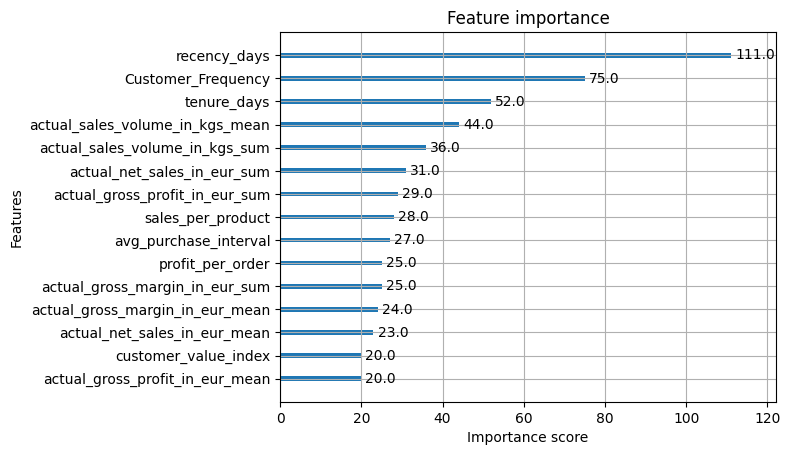

In [89]:
xgb.plot_importance(final_model, max_num_features=15)


SyntaxError: invalid syntax (4093937621.py, line 1)

In [ ]:
# # If using xgb.train(), convert X_val to DMatrix
# dval = xgb.DMatrix(X_val)

# # Predict probabilities
# y_pred_prob = final_model.predict(dval)

# # Predict class labels (threshold 0.5, adjust if needed)
# y_pred = (y_pred_prob >= 0.5).astype(int)


In [76]:
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# ROC AUC
auc = roc_auc_score(y_val, y_pred_prob)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)

# Precision
precision = precision_score(y_val, y_pred)

# Recall (important for churn detection)
recall = recall_score(y_val, y_pred)

# F1 Score (harmonic mean of precision & recall)
f1 = f1_score(y_val, y_pred)

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)

print("Validation Metrics:")
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)


Validation Metrics:
AUC: 0.9826
Accuracy: 0.9410
Precision: 0.9716
Recall: 0.9258
F1 Score: 0.9481
Confusion Matrix:
[[484  19]
 [ 52 649]]


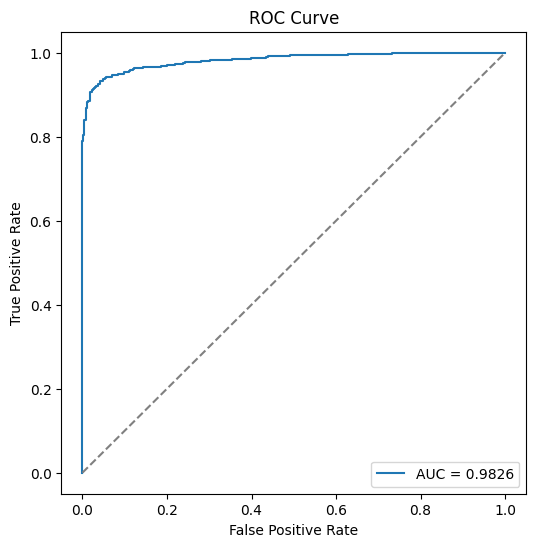

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


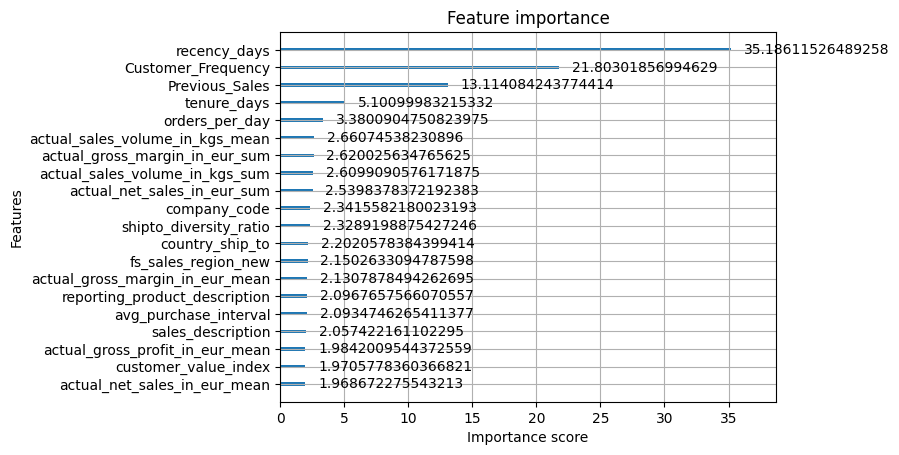

In [84]:
import matplotlib.pyplot as plt

xgb.plot_importance(final_model, max_num_features=20, importance_type='gain')
plt.show()


In [ ]:
break

In [ ]:
customer_agg = df.groupby('customer').agg({
    'global_business_unit': ['first', 'last', pd.Series.nunique],
    'industry_segment': ['first', 'last', pd.Series.nunique],
    'market_segment': pd.Series.nunique,
    'fiscal_period': pd.Series.nunique,
    'actual_sales_volume_in_kgs': 'sum',
    'actual_net_sales_in_eur': 'sum',
    'actual_gross_margin_in_eur': 'sum',
    'actual_gross_profit_in_eur': 'sum',
    'product': pd.Series.nunique,
    'chem_group': ['first', 'last', pd.Series.nunique],
    'material_sku': pd.Series.nunique,
    'plant_pfc': ['first', 'last', pd.Series.nunique],
    'profit_center': ['first', 'last', pd.Series.nunique],
    'region_global': ['first', 'last'],
    'reporting_sub_group': ['first', 'last', pd.Series.nunique],
    'key_account_manager': 'count',
    'caretaker': 'count',
    'd_a': 'count',
    'fs_formula_type': 'count',
    'country_customer': 'first'
}).reset_index()

# Flatten MultiIndex columns
customer_agg.columns = ['_'.join(filter(None, col)).strip('_') for col in customer_agg.columns.values]


In [ ]:
# Average order value
customer_agg['average_order_value'] = customer_agg['actual_net_sales_in_eur_sum'] / customer_agg['fiscal_period_nunique']

# Product diversity ratio
customer_agg['product_diversity_ratio'] = customer_agg['product_nunique'] / customer_agg['fiscal_period_nunique']

# Customer relationship age
customer_agg['customer_relationship_age'] = df.groupby('customer')['fiscal_period'].max() - df.groupby('customer')['fiscal_period'].min()
customer_agg['customer_relationship_age'] = customer_agg['customer_relationship_age'].dt.days // 30  # in months

# Last order values
last_orders = df.sort_values(['customer', 'fiscal_period']).groupby('customer').last().reset_index()
customer_agg['last_invoiced_amount'] = last_orders['actual_net_sales_in_eur']
customer_agg['last_gross_margin'] = last_orders['actual_gross_margin_in_eur']
customer_agg['last_order_cancelled'] = last_orders['reason_for_cancelled_orders'].notna().astype(int)


In [ ]:
# churn_df columns: ['customer', 'Customer_Frequency', 'Current_Sales', 'Previous_Sales', 'is_churn']
final_df = customer_agg.merge(churn_df[['customer', 'Customer_Frequency', 'is_churn']], on='customer', how='left')


In [ ]:
# Start year and month
df['year'] = df['fiscal_period'].dt.year
df['month'] = df['fiscal_period'].dt.month

customer_start = df.groupby('customer').agg({'year':'min','month':'min'}).reset_index()
final_df = final_df.merge(customer_start, on='customer', how='left')
final_df.rename(columns={'year':'start_year', 'month':'start_month'}, inplace=True)


In [ ]:
final_df.shape

(6019, 44)

In [ ]:
final_df.head()

,customer,global_business_unit_first,global_business_unit_last,global_business_unit_nunique,industry_segment_first,industry_segment_last,industry_segment_nunique,market_segment_nunique,fiscal_period_nunique,actual_sales_volume_in_kgs_sum,...,average_order_value,product_diversity_ratio,customer_relationship_age,last_invoiced_amount,last_gross_margin,last_order_cancelled,Customer_Frequency,is_churn,start_year,start_month
0,10040,Coatings & Construction,Coatings & Construction,1,Construction,Construction,1,3,40,2691960.0,...,122750.026375,0.075000,NaN,73163.64510,31693.444341,1,Monthly,0.0,2022,1
1,10055,Health & Protection and Perf. Materials,Health & Protection and Perf. Materials,3,Carpet,Carpet,5,6,40,2880270.0,...,74950.098071,0.300000,NaN,0.00000,-17496.190000,1,Monthly,0.0,2022,1
2,10101,Coatings & Construction,Coatings & Construction,1,Fibre Bonding,Fibre Bonding,2,2,21,1527801.0,...,76617.829048,0.238095,NaN,4688.12000,2180.330000,1,Monthly,1.0,2022,1
3,10105,Health & Protection and Perf. Materials,Health & Protection and Perf. Materials,1,Carpet,Carpet,1,1,3,258000.0,...,104759.930000,0.666667,NaN,51296.00000,14077.470000,1,Monthly,1.0,2022,1
4,10113,Health & Protection and Perf. Materials,Health & Protection and Perf. Materials,1,Gloves,Gloves,1,1,40,8029479.0,...,207707.367939,0.125000,NaN,94090.76153,30872.838098,1,Monthly,0.0,2022,1


In [ ]:
# Fill NaNs if necessary
final_df.fillna(0, inplace=True)

print("Final training dataset shape:", final_df.shape)
final_df.head(20)


Final training dataset shape: (6019, 44)


,customer,global_business_unit_first,global_business_unit_last,global_business_unit_nunique,industry_segment_first,industry_segment_last,industry_segment_nunique,market_segment_nunique,fiscal_period_nunique,actual_sales_volume_in_kgs_sum,...,average_order_value,product_diversity_ratio,customer_relationship_age,last_invoiced_amount,last_gross_margin,last_order_cancelled,Customer_Frequency,is_churn,start_year,start_month
0,10040,Coatings & Construction,Coatings & Construction,1,Construction,Construction,1,3,40,2691960.0,...,122750.026375,0.075000,0.0,73163.645100,31693.444341,1,Monthly,0.0,2022,1
1,10055,Health & Protection and Perf. Materials,Health & Protection and Perf. Materials,3,Carpet,Carpet,5,6,40,2880270.0,...,74950.098071,0.300000,0.0,0.000000,-17496.190000,1,Monthly,0.0,2022,1
2,10101,Coatings & Construction,Coatings & Construction,1,Fibre Bonding,Fibre Bonding,2,2,21,1527801.0,...,76617.829048,0.238095,0.0,4688.120000,2180.330000,1,Monthly,1.0,2022,1
3,10105,Health & Protection and Perf. Materials,Health & Protection and Perf. Materials,1,Carpet,Carpet,1,1,3,258000.0,...,104759.930000,0.666667,0.0,51296.000000,14077.470000,1,Monthly,1.0,2022,1
4,10113,Health & Protection and Perf. Materials,Health & Protection and Perf. Materials,1,Gloves,Gloves,1,1,40,8029479.0,...,207707.367939,0.125000,0.0,94090.761530,30872.838098,1,Monthly,0.0,2022,1
5,10124,Coatings & Construction,Coatings & Construction,2,Construction,Construction,2,2,39,3765843.0,...,160875.920037,0.205128,0.0,35727.620580,11092.068291,1,Monthly,0.0,2022,1
6,10127,Coatings & Construction,Coatings & Construction,1,Construction,Construction,1,4,40,1835122.0,...,102880.541575,0.250000,0.0,36541.938726,18548.154918,1,Monthly,0.0,2022,1
7,10130,Health & Protection and Perf. Materials,Health & Protection and Perf. Materials,1,Gloves,Gloves,1,2,38,6171090.0,...,145142.488577,0.052632,0.0,37596.391384,19578.261995,1,Monthly,0.0,2022,1
8,10142,Coatings & Construction,Coatings & Construction,1,Fibre Bonding,Fibre Bonding,1,1,2,32000.0,...,58880.653651,0.500000,0.0,61339.351792,2453.578814,1,Monthly,1.0,2022,3
9,10145,Coatings & Construction,Coatings & Construction,1,Construction,Construction,1,2,4,271201.0,...,84062.778947,0.500000,0.0,24763.720000,8790.960000,1,Yearly,0.0,2022,5


In [ ]:
final_df.columns

Index(['customer', 'global_business_unit_first', 'global_business_unit_last',
       'global_business_unit_nunique', 'industry_segment_first',
       'industry_segment_last', 'industry_segment_nunique',
       'market_segment_nunique', 'fiscal_period_nunique',
       'actual_sales_volume_in_kgs_sum', 'actual_net_sales_in_eur_sum',
       'actual_gross_margin_in_eur_sum', 'actual_gross_profit_in_eur_sum',
       'product_nunique', 'chem_group_first', 'chem_group_last',
       'chem_group_nunique', 'material_sku_nunique', 'plant_pfc_first',
       'plant_pfc_last', 'plant_pfc_nunique', 'profit_center_first',
       'profit_center_last', 'profit_center_nunique', 'region_global_first',
       'region_global_last', 'reporting_sub_group_first',
       'reporting_sub_group_last', 'reporting_sub_group_nunique',
       'key_account_manager_count', 'caretaker_count', 'd_a_count',
       'fs_formula_type_count', 'country_customer_first',
       'average_order_value', 'product_diversity_ratio',
  

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Categorical columns
categorical_cols = [
    'global_business_unit_first', 'global_business_unit_last',
    'industry_segment_first', 'industry_segment_last',
    'chem_group_first', 'chem_group_last',
    'plant_pfc_first', 'plant_pfc_last',
    'profit_center_first', 'profit_center_last',
    'region_global_first', 'region_global_last',
    'reporting_sub_group_first', 'reporting_sub_group_last',
    'country_customer_first',
    'Customer_Frequency'
]

# Initialize encoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform
encoded_array = ohe.fit_transform(final_df[categorical_cols])

# Convert back to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(categorical_cols))

# Combine with numerical columns and target
numerical_cols = [
    'actual_sales_volume_in_kgs_sum', 'actual_net_sales_in_eur_sum',
    'actual_gross_margin_in_eur_sum', 'actual_gross_profit_in_eur_sum',
    'average_order_value', 'product_diversity_ratio', 'customer_relationship_age',
    'last_invoiced_amount', 'last_gross_margin', 'last_order_cancelled',
    'key_account_manager_count', 'caretaker_count', 'd_a_count', 'fs_formula_type_count',
    'fiscal_period_nunique', 'product_nunique'
]

model_df = pd.concat([final_df[numerical_cols].reset_index(drop=True),
                      encoded_df.reset_index(drop=True),
                      final_df['is_churn'].reset_index(drop=True)], axis=1)


In [ ]:
model_df.head(10)

,actual_sales_volume_in_kgs_sum,actual_net_sales_in_eur_sum,actual_gross_margin_in_eur_sum,actual_gross_profit_in_eur_sum,average_order_value,product_diversity_ratio,customer_relationship_age,last_invoiced_amount,last_gross_margin,last_order_cancelled,...,country_customer_first_Utd.Arab.Emir.,country_customer_first_Uzbekistan,country_customer_first_Venezuela,country_customer_first_Vietnam,country_customer_first_Yemen,country_customer_first_Zambia,Customer_Frequency_Monthly,Customer_Frequency_Quarterly,Customer_Frequency_Yearly,is_churn
0,2691960.0,4.910001e+06,1.995002e+06,1.690989e+06,122750.026375,0.075000,0.0,73163.645100,31693.444341,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2880270.0,2.998004e+06,5.662325e+05,1.062072e+05,74950.098071,0.300000,0.0,0.000000,-17496.190000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1527801.0,1.608974e+06,4.005392e+05,2.124074e+05,76617.829048,0.238095,0.0,4688.120000,2180.330000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,258000.0,3.142798e+05,9.633424e+04,7.708650e+04,104759.930000,0.666667,0.0,51296.000000,14077.470000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,8029479.0,8.308295e+06,3.075251e+06,1.787680e+06,207707.367939,0.125000,0.0,94090.761530,30872.838098,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,3765843.0,6.274161e+06,2.097094e+06,1.655160e+06,160875.920037,0.205128,0.0,35727.620580,11092.068291,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1835122.0,4.115222e+06,1.436488e+06,8.599589e+05,102880.541575,0.250000,0.0,36541.938726,18548.154918,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,6171090.0,5.515415e+06,1.585142e+06,8.113123e+05,145142.488577,0.052632,0.0,37596.391384,19578.261995,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,32000.0,1.177613e+05,7.533822e+04,7.111646e+04,58880.653651,0.500000,0.0,61339.351792,2453.578814,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,271201.0,3.362511e+05,4.996246e+04,2.680592e+04,84062.778947,0.500000,0.0,24763.720000,8790.960000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
model_df.shape

(6019, 867)